Trainset: df.csv

Testset: test_prep.csv

(각각 범주형 -> 1,0 / 0,1,2 .. 등으로 전처리한 것)

# 1. 깡통 MLP (얘 데이터는 맨 아래에 ML 방법들이랑 비교할때만 나옴! 텍스트 바로 아래 코드는 2번임 (MLP +@)

🔹 모델 아키텍처 (MLP)
	•	입력층: 전처리된 피처 벡터 (input_dim)

  •	은닉층 구조:

>	1.	Dense(512, relu) → BatchNormalization → Dropout(0.3)
2.	Dense(256, relu) → BatchNormalization → Dropout(0.4)
3.	Dense(128, relu) → BatchNormalization → Dropout(0.3)
4.	Dense(64, relu)  → BatchNormalization → Dropout(0.2)
5.	Dense(32, relu)  → Dropout(0.1)

  •	출력층: Dense(num_classes, softmax)

→ 다중 클래스 분류용 확률 분포 출력

#2. 추가된 최적화 보완 기법들 (아래 코드)

🔹 학습 설정
	•	손실 함수: sparse_categorical_crossentropy
(타겟이 정수형 라벨일 때 사용)

	•	최적화 기법: Adam(learning_rate=0.001)

	•	평가지표: 기본 accuracy

	•	클래스 불균형 보정: compute_class_weight('balanced')로 산출한 가중치 적용

  -> 이건 아래 코드 (1~3번 비교하는 코드 에서 '3번 모델 - storngweight에 있는 거랑 같음')


🔹 규제 및 일반화 기법
	•	Batch Normalization: 각 주요 은닉층 뒤에 배치 → 학습 안정화 및 수렴 가속

	•	Dropout: 0.1~0.4 범위로 계층별 적용 → 과적합 방지

	•	EarlyStopping: val_loss 모니터링, patience=15, 최적 가중치 복원

	•	ReduceLROnPlateau: val_loss 모니터링, 개선 없을 때 학습률 0.5배 감소, 최소 1e-7




데이터 로딩 중...
훈련 데이터 형태: (30858, 10)
테스트 데이터 형태: (13225, 9)
훈련 데이터 컬럼: ['ID', 'age', 'gender', 'tenure', 'frequent', 'payment_interval', 'subscription_type', 'contract_length', 'after_interaction', 'support_needs']
테스트 데이터 컬럼: ['ID', 'age', 'gender', 'tenure', 'frequent', 'payment_interval', 'subscription_type', 'contract_length', 'after_interaction']

=== 타겟 변수 분포 ===
support_needs
0    14297
1     8297
2     8264
Name: count, dtype: int64
비율:
support_needs
0    0.463316
1    0.268877
2    0.267807
Name: proportion, dtype: float64

=== 데이터 전처리 ===
수치형 컬럼: 8개
범주형 컬럼: 1개
수치형 컬럼: 8개
범주형 컬럼: 1개
훈련 세트: (24686, 9)
검증 세트: (6172, 9)
테스트 세트: (13225, 9)

클래스 가중치: {np.int64(0): np.float64(0.7194777185159278), np.int64(1): np.float64(1.239630410766295), np.int64(2): np.float64(1.2446931881208088)}

=== 모델 구조 ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,619 (717.26 KB)

 Trainable params: 181,699 (709.76 KB)

 Non-trainable params: 1,920 (7.50 KB)


=== 모델 훈련 시작 ===
Epoch 1/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3854 - loss: 1.1972 — val_f1_macro: 0.4350
772/772 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3855 - loss: 1.1971 - val_accuracy: 0.4682 - val_loss: 1.0474 - learning_rate: 0.0010 - val_f1_macro: 0.4350
Epoch 2/100
763/772 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4439 - loss: 1.0655 — val_f1_macro: 0.4592
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4440 - loss: 1.0655 - val_accuracy: 0.4682 - val_loss: 1.0337 - learning_rate: 0.0010 - val_f1_macro: 0.4592
Epoch 3/100
754/772 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4586 - loss: 1.0479 — val_f1_macro: 0.4497
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4586 - loss: 1.0478 - val_accuracy: 0.4819 - val_loss: 1.0237 - learning_rate: 0.0010 - val_f1_macro: 0.4497
Epoch 4/100
755/772 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4664 - loss: 1.0373 — val_f1_macro: 0.4621
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accur

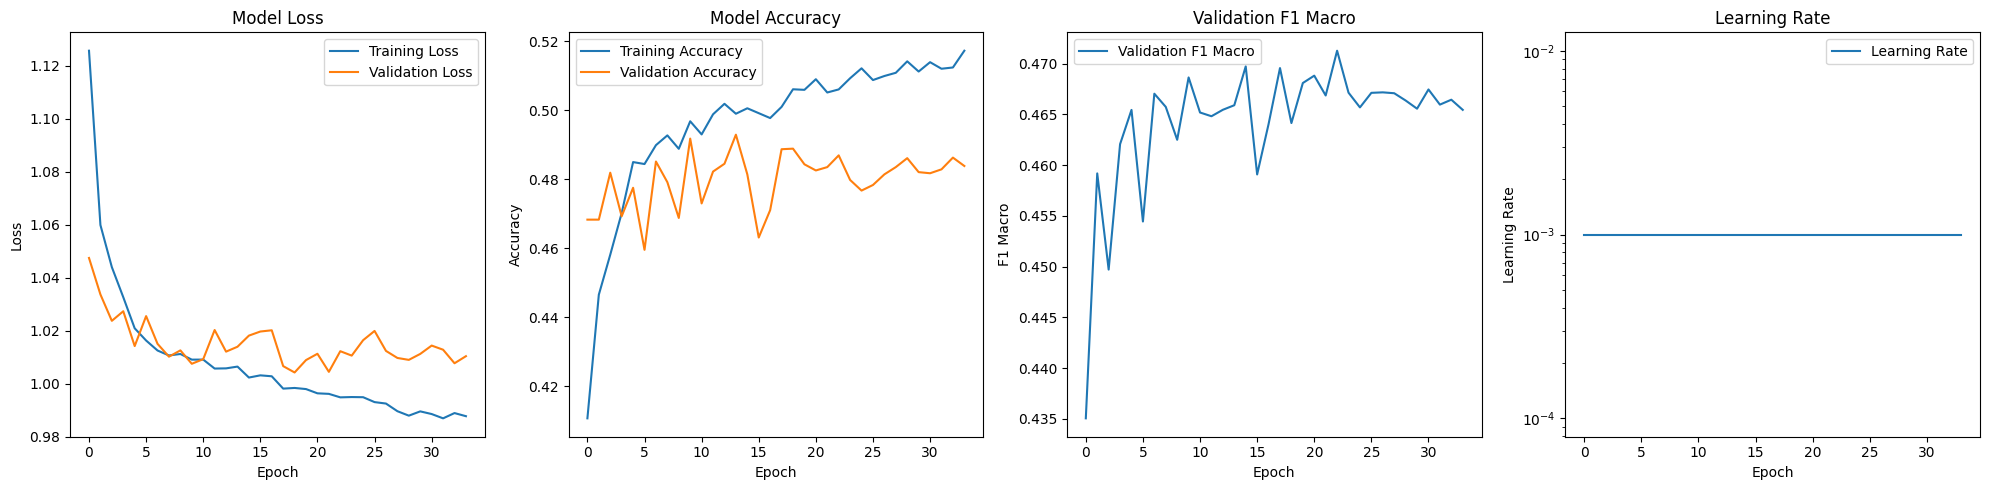


=== 검증 세트 평가 ===
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.6391    0.4948    0.5577      2860
           1     0.3466    0.2628    0.2989      1659
           2     0.4319    0.7054    0.5357      1653

    accuracy                         0.4888      6172
   macro avg     0.4725    0.4876    0.4641      6172
weighted avg     0.5050    0.4888    0.4823      6172


Validation F1 Macro: 0.4641

Confusion Matrix:


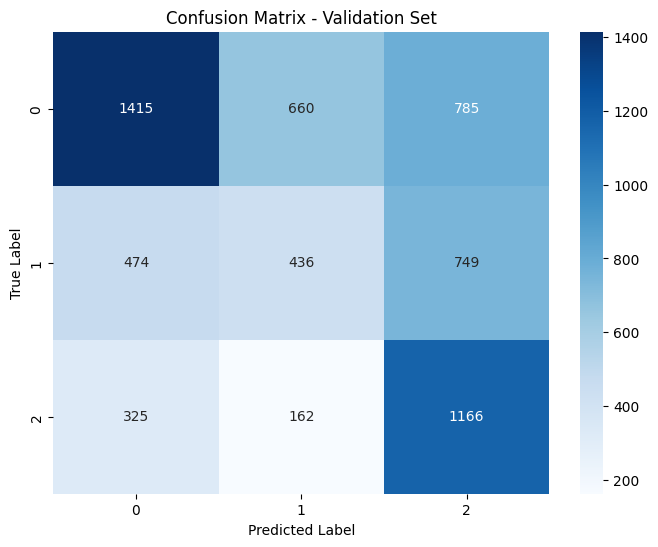


=== 테스트 데이터 예측 ===
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
예측 결과 분포:
0    4908
1    2493
2    5824
Name: count, dtype: int64
비율:
0    0.371115
1    0.188507
2    0.440378
Name: proportion, dtype: float64

예측 결과가 'support_needs_predictions.csv' 파일로 저장되었습니다.
총 13225개의 예측 결과가 저장되었습니다.

=== 모델 성능 요약 ===
최고 검증 정확도 (val_acc): 0.4929
최저 검증 손실 (val_loss): 1.0042
최고 검증 F1 Macro: 0.4713 (epoch 23)
마지막 에폭 기준 검증 F1 Macro: 0.4641

=== 실행 완료 ===


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score  # ⬅️ 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback  # ⬅️ Callback 추가
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# F1-macro 콜백 정의 ⬅️ 추가
# =========================
class F1MacroCallback(Callback):
    def __init__(self, x_val, y_val):
        super().__init__()
        self.x_val = x_val
        self.y_val = y_val
        self.history_vals = []

    def on_epoch_end(self, epoch, logs=None):
        y_prob = self.model.predict(self.x_val, verbose=0)
        y_pred = np.argmax(y_prob, axis=1)
        f1m = f1_score(self.y_val, y_pred, average='macro')
        self.history_vals.append(f1m)
        if logs is not None:
            logs['val_f1_macro'] = f1m  # History에 기록
        print(f" — val_f1_macro: {f1m:.4f}")


# 1. 데이터 로딩
print("데이터 로딩 중...")
train_df = pd.read_csv('df.csv')
test_df = pd.read_csv('test_prep.csv')

print(f"훈련 데이터 형태: {train_df.shape}")
print(f"테스트 데이터 형태: {test_df.shape}")
print(f"훈련 데이터 컬럼: {train_df.columns.tolist()}")
print(f"테스트 데이터 컬럼: {test_df.columns.tolist()}")

# 2. 타겟 변수 분포 확인
print("\n=== 타겟 변수 분포 ===")
target_counts = train_df['support_needs'].value_counts().sort_index()
print(target_counts)
print(f"비율:\n{train_df['support_needs'].value_counts(normalize=True).sort_index()}")

# 3. 데이터 전처리
def preprocess_data(df, is_train=True, scaler=None, encoders=None):
    df_processed = df.copy()

    # 수치형 컬럼과 범주형 컬럼 분리
    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()

    if is_train and 'support_needs' in numeric_columns:
        numeric_columns.remove('support_needs')

    print(f"수치형 컬럼: {len(numeric_columns)}개")
    print(f"범주형 컬럼: {len(categorical_columns)}개")

    # 범주형 데이터 인코딩
    if encoders is None:
        encoders = {}

    for col in categorical_columns:
        if col not in encoders:
            encoders[col] = LabelEncoder()
            df_processed[col] = encoders[col].fit_transform(df_processed[col].astype(str))
        else:
            # 테스트 데이터에 새로운 카테고리가 있을 경우 처리
            unique_values = set(df_processed[col].astype(str).unique())
            known_values = set(encoders[col].classes_)

            if unique_values - known_values:
                # 새로운 카테고리를 0으로 매핑
                df_processed[col] = df_processed[col].astype(str).map(
                    dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_)))
                ).fillna(0)
            else:
                df_processed[col] = encoders[col].transform(df_processed[col].astype(str))

    # 결측치 처리
    df_processed = df_processed.fillna(df_processed.median(numeric_only=True))
    df_processed = df_processed.fillna(0)  # 범주형 결측치

    # 특성 스케일링
    feature_columns = [col for col in df_processed.columns if col != 'support_needs']

    if scaler is None:
        scaler = StandardScaler()
        df_processed[feature_columns] = scaler.fit_transform(df_processed[feature_columns])
    else:
        df_processed[feature_columns] = scaler.transform(df_processed[feature_columns])

    return df_processed, scaler, encoders

# 전처리 실행
print("\n=== 데이터 전처리 ===")
train_processed, scaler, encoders = preprocess_data(train_df, is_train=True)
test_processed, _, _ = preprocess_data(test_df, is_train=False, scaler=scaler, encoders=encoders)

# 4. 훈련/검증 데이터 분할
X = train_processed.drop('support_needs', axis=1)
y = train_processed['support_needs']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 세트: {X_train.shape}")
print(f"검증 세트: {X_val.shape}")
print(f"테스트 세트: {test_processed.shape}")

# 5. 클래스 가중치 계산 (불균형 데이터 처리)
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(f"\n클래스 가중치: {class_weight_dict}")

# 6. MLP 모델 구축
def build_mlp_model(input_dim, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.1),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 모델 생성
model = build_mlp_model(X_train.shape[1], len(np.unique(y)))
print(f"\n=== 모델 구조 ===")
model.summary()

# 7. 콜백 설정
f1_cb = F1MacroCallback(X_val, y_val)  # ⬅️ 추가
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    ),
    f1_cb  # ⬅️ 추가
]

# 8. 모델 훈련
print("\n=== 모델 훈련 시작 ===")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# 9. 훈련 과정 시각화 (F1 macro 곡선 추가) ⬅️ 수정
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.subplot(1, 4, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 4, 3)
val_f1_hist = history.history.get('val_f1_macro', f1_cb.history_vals)
plt.plot(val_f1_hist, label='Validation F1 Macro')
plt.title('Validation F1 Macro')
plt.xlabel('Epoch'); plt.ylabel('F1 Macro'); plt.legend()

plt.subplot(1, 4, 4)
plt.plot(history.history['lr'] if 'lr' in history.history else [0.001] * len(history.history['loss']), label='Learning Rate')
plt.title('Learning Rate')
plt.xlabel('Epoch'); plt.ylabel('Learning Rate'); plt.yscale('log'); plt.legend()

plt.tight_layout()
plt.show()

# 10. 검증 세트 평가 (F1 macro 추가 출력) ⬅️ 추가
print("\n=== 검증 세트 평가 ===")
val_predictions = model.predict(X_val)
val_pred_classes = np.argmax(val_predictions, axis=1)

print("Classification Report:")
print(classification_report(y_val, val_pred_classes, digits=4))  # macro avg 포함

val_f1_macro = f1_score(y_val, val_pred_classes, average='macro')  # ⬅️ 추가
print(f"\nValidation F1 Macro: {val_f1_macro:.4f}")  # ⬅️ 추가

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()

# 11. 테스트 데이터 예측
print("\n=== 테스트 데이터 예측 ===")
test_predictions = model.predict(test_processed)
test_pred_classes = np.argmax(test_predictions, axis=1)

# 예측 확률과 함께 결과 출력
print("예측 결과 분포:")
pred_counts = pd.Series(test_pred_classes).value_counts().sort_index()
print(pred_counts)
print(f"비율:\n{pd.Series(test_pred_classes).value_counts(normalize=True).sort_index()}")

# 12. 결과를 CSV 파일로 저장
result_df = pd.DataFrame({
    'predicted_support_needs': test_pred_classes,
    'prediction_probability_0': test_predictions[:, 0],
    'prediction_probability_1': test_predictions[:, 1],
    'prediction_probability_2': test_predictions[:, 2]
})

# 원본 테스트 데이터의 인덱스 보존
if 'index' in test_df.columns:
    result_df['original_index'] = test_df['index']
else:
    result_df['original_index'] = test_df.index

result_df.to_csv('support_needs_predictions.csv', index=False)
print(f"\n예측 결과가 'support_needs_predictions.csv' 파일로 저장되었습니다.")
print(f"총 {len(result_df)}개의 예측 결과가 저장되었습니다.")

# 13. 모델 성능 요약 (최고 F1 macro 포함) ⬅️ 수정
print("\n=== 모델 성능 요약 ===")
final_val_acc = max(history.history['val_accuracy'])
final_val_loss = min(history.history['val_loss'])
val_f1_hist = history.history.get('val_f1_macro', f1_cb.history_vals)
best_f1 = max(val_f1_hist) if len(val_f1_hist) else val_f1_macro
best_f1_epoch = (np.argmax(val_f1_hist) + 1) if len(val_f1_hist) else None

print(f"최고 검증 정확도 (val_acc): {final_val_acc:.4f}")
print(f"최저 검증 손실 (val_loss): {final_val_loss:.4f}")
print(f"최고 검증 F1 Macro: {best_f1:.4f}" + (f" (epoch {best_f1_epoch})" if best_f1_epoch is not None else ""))
print(f"마지막 에폭 기준 검증 F1 Macro: {val_f1_macro:.4f}")

print("\n=== 실행 완료 ===")

# 🔹 모델 1: CrossEntropy + Class Weight
	•	데이터: SMOTEENN으로 밸런싱된 데이터 사용
	•	손실함수: sparse_categorical_crossentropy (일반 Cross-Entropy)
	•	클래스 불균형 대응: class_weight_dict 적용 (보수적으로 조정한 클래스 가중치)
	•	특징:
	•	데이터 샘플링(오버샘플링+언더샘플링)과 클래스 가중치를 동시에 사용 → 과소표집 클래스 학습을 돕는다.
	•	가장 “전통적인” 접근.

⸻

# 🔹 모델 2: Improved Focal Loss
	•	데이터: SMOTEENN으로 밸런싱된 데이터 사용
	•	손실함수: ImprovedFocalLoss
	•	γ=1.5 → 어려운 샘플에 더 가중치 (보수적으로 설정)
	•	label_smoothing=0.05 → 과적합 방지 및 모델 일반화 강화
	•	alpha_values = [1.0, 2.0, 2.0] → 소수 클래스에 더 높은 가중치
	•	클래스 가중치: class_weight 사용하지 않음 (Focal Loss 자체가 클래스 불균형 보정 역할 수행)
	•	특징:
	•	불균형 상황에서 어려운 샘플과 소수 클래스에 집중
	•	CrossEntropy보다 불균형/잡음에 더 강건

⸻

# 🔹 모델 3: Strong Class Weight (원본 데이터)
	•	데이터: 원본 데이터 그대로 (SMOTEENN 적용하지 않음)
	•	손실함수: sparse_categorical_crossentropy

	•	클래스 불균형 대응: compute_class_weight('balanced')로 계산한 강한 클래스 가중치 적용
	•	특징:
	•	데이터 자체는 수정하지 않고, 클래스 가중치만 조정
	•	데이터 증강(샘플링)으로 생길 수 있는 노이즈를 피할 수 있음
	•	대신 데이터 불균형을 직접 안고 가야 하므로 학습 난이도 ↑

⸻

✨ 차이를 한 줄로 요약하면
	•	모델 1: 밸런싱된 데이터 + 보수적 클래스 가중치 + 일반 CrossEntropy

	•	모델 2: 밸런싱된 데이터 + 개선된 Focal Loss (label smoothing + alpha)

	•	모델 3: 원본 데이터 + 강한 클래스 가중치 + 일반 CrossEntropy

즉,

👉 모델 1은 샘플링 + 가중치 기반 전통적 접근

👉 모델 2는 샘플링 + Focal Loss 기반 딥러닝 친화적 접근

👉 모델 3은 샘플링 없이 클래스 가중치만으로 해결하려는 접근

데이터 로딩 중...
훈련 데이터 형태: (30858, 10)
테스트 데이터 형태: (13225, 9)

=== 타겟 변수 분포 (원본) ===
support_needs
0    14297
1     8297
2     8264
Name: count, dtype: int64
비율:
support_needs
0    0.463316
1    0.268877
2    0.267807
Name: proportion, dtype: float64
불균형 비율: 1.73:1

=== 데이터 전처리 ===
수치형 컬럼: 8개
범주형 컬럼: 1개
수치형 컬럼: 8개
범주형 컬럼: 1개

=== 분할 후 데이터 크기 ===
훈련 세트: (24686, 9)
검증 세트: (6172, 9)

=== 샘플링 기법 적용: SMOTEENN ===
샘플링 후 분포:
support_needs
0    1747
1    4174
2    4587
Name: count, dtype: int64
균형 조정 후 크기: (10508, 9)
조정된 클래스 가중치: {np.int64(0): np.float64(1.2029765311963365), np.int64(1): np.float64(0.8391630729915349), np.int64(2): np.float64(0.7636072959813966)}
Focal Loss Alpha 값: [1. 2. 2.]

=== 모델 1: CrossEntropy ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 — [CrossEntropy] val_f1_macro: 0.3232
 — [CrossEntropy] val_f1_macro: 0.4029
 — [CrossEntropy] val_f1_macro: 0.4350
 — [CrossEntropy] val_f1_macro: 0.4366
 — [CrossEntropy] val_f1_macro: 0.4416
 — [CrossEntropy] val_f1_macro: 0.4458
 — [CrossEntropy] val_f1_macro: 0.4467
 — [CrossEntropy] val_f1_macro: 0.4516
 — [CrossEntropy] val_f1_macro: 0.4491
 — [CrossEntropy] val_f1_macro: 0.4466
 — [CrossEntropy] val_f1_macro: 0.4508
 — [CrossEntropy] val_f1_macro: 0.4539
 — [CrossEntropy] val_f1_macro: 0.4529
 — [CrossEntropy] val_f1_macro: 0.4470
 — [CrossEntropy] val_f1_macro: 0.4507
 — [CrossEntropy] val_f1_macro: 0.4515

=== 모델 2: FocalLoss ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 — [FocalLoss] val_f1_macro: 0.2291
 — [FocalLoss] val_f1_macro: 0.2314
 — [FocalLoss] val_f1_macro: 0.2296
 — [FocalLoss] val_f1_macro: 0.2313
 — [FocalLoss] val_f1_macro: 0.2080
 — [FocalLoss] val_f1_macro: 0.2060
 — [FocalLoss] val_f1_macro: 0.1803
 — [FocalLoss] val_f1_macro: 0.1973
 — [FocalLoss] val_f1_macro: 0.1622
 — [FocalLoss] val_f1_macro: 0.1675
 — [FocalLoss] val_f1_macro: 0.1748
 — [FocalLoss] val_f1_macro: 0.1407
 — [FocalLoss] val_f1_macro: 0.1407
 — [FocalLoss] val_f1_macro: 0.1407
 — [FocalLoss] val_f1_macro: 0.1408
 — [FocalLoss] val_f1_macro: 0.1408

=== 모델 3: StrongWeight ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 — [StrongWeight] val_f1_macro: 0.4394
 — [StrongWeight] val_f1_macro: 0.4641
 — [StrongWeight] val_f1_macro: 0.4678
 — [StrongWeight] val_f1_macro: 0.4641
 — [StrongWeight] val_f1_macro: 0.4654
 — [StrongWeight] val_f1_macro: 0.4686
 — [StrongWeight] val_f1_macro: 0.4693
 — [StrongWeight] val_f1_macro: 0.4651
 — [StrongWeight] val_f1_macro: 0.4650
 — [StrongWeight] val_f1_macro: 0.4684
 — [StrongWeight] val_f1_macro: 0.4649
 — [StrongWeight] val_f1_macro: 0.4689
 — [StrongWeight] val_f1_macro: 0.4675
 — [StrongWeight] val_f1_macro: 0.4660
 — [StrongWeight] val_f1_macro: 0.4696
 — [StrongWeight] val_f1_macro: 0.4672
 — [StrongWeight] val_f1_macro: 0.4710
 — [StrongWeight] val_f1_macro: 0.4641
 — [StrongWeight] val_f1_macro: 0.4687
 — [StrongWeight] val_f1_macro: 0.4696
 — [StrongWeight] val_f1_macro: 0.4657
 — [StrongWeight] val_f1_macro: 0.4697
 — [StrongWeight] val_f1_macro: 0.4694

=== 모델별 성능 평가 ===

--- CrossEntropy ---
예측 분포: {0: 674, 1: 4582, 2: 916}
Macro F1 Score: 0.3232

--- F

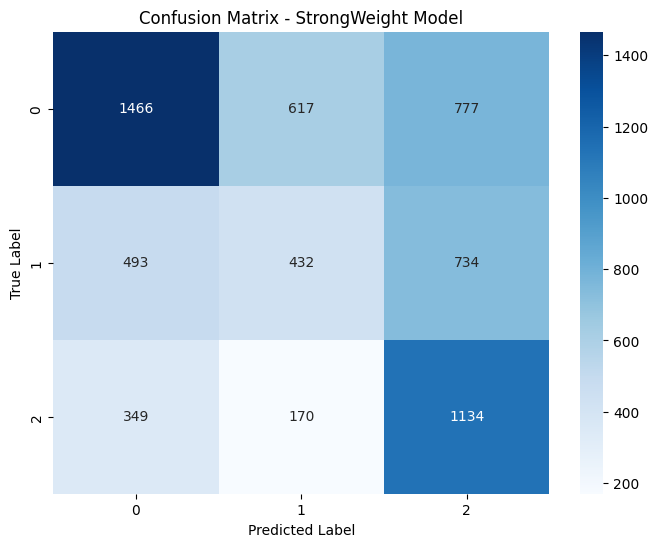

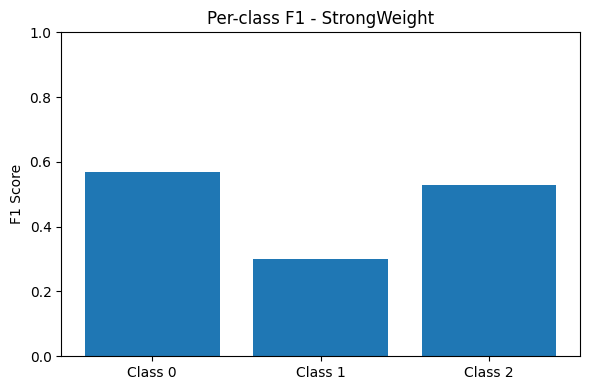


=== 앙상블 예측 ===
앙상블 예측 분포: {0: 961, 1: 2996, 2: 2215}
앙상블 Macro F1 Score: 0.4138
StrongWeight 단일 모델이 더 좋은 성능을 보임

=== 최종 테스트 예측 결과 ===
예측 분포: {0: 5009, 1: 2619, 2: 5597}
예측 비율: {0: 0.3787523629489603, 1: 0.19803402646502835, 2: 0.42321361058601137}

예측 결과가 'support_needs_predictions_improved_strongweight.csv' 파일로 저장되었습니다.

=== 최종 성능 요약 ===
사용된 최종 모델: StrongWeight
검증 데이터 F1 Score: 0.4651

각 클래스 테스트 예측 비율:
클래스 0: 0.379
클래스 1: 0.198
클래스 2: 0.423


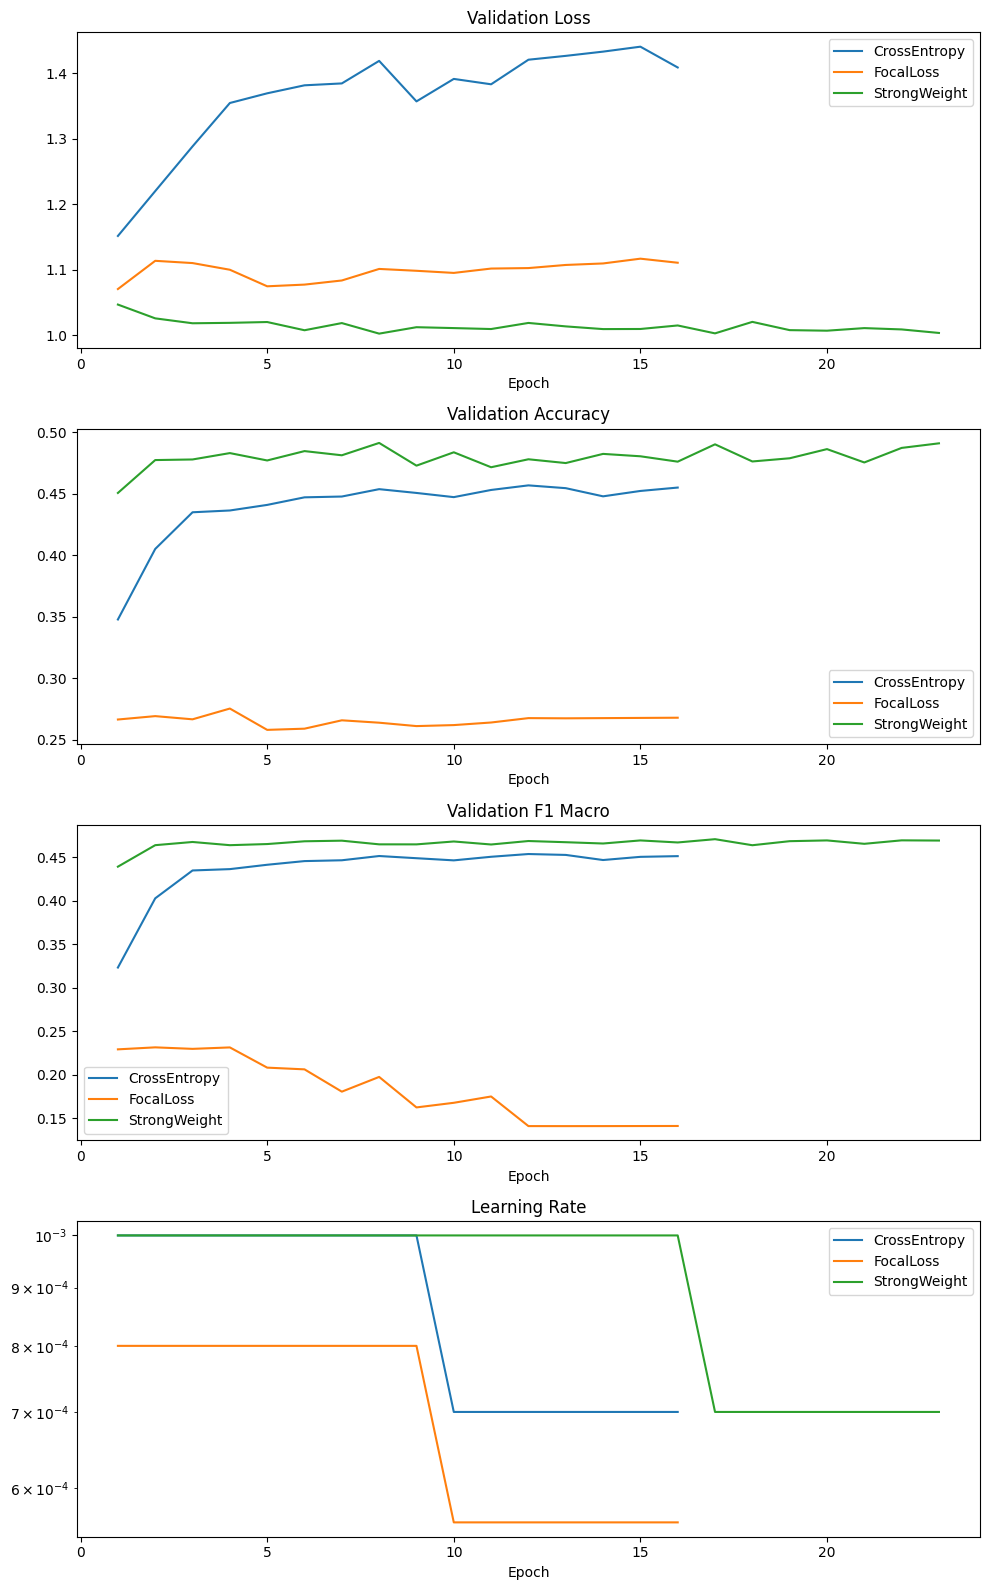

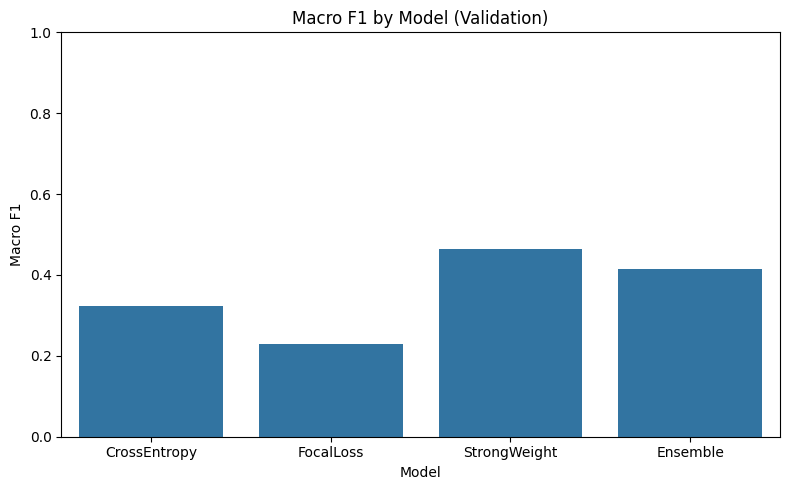

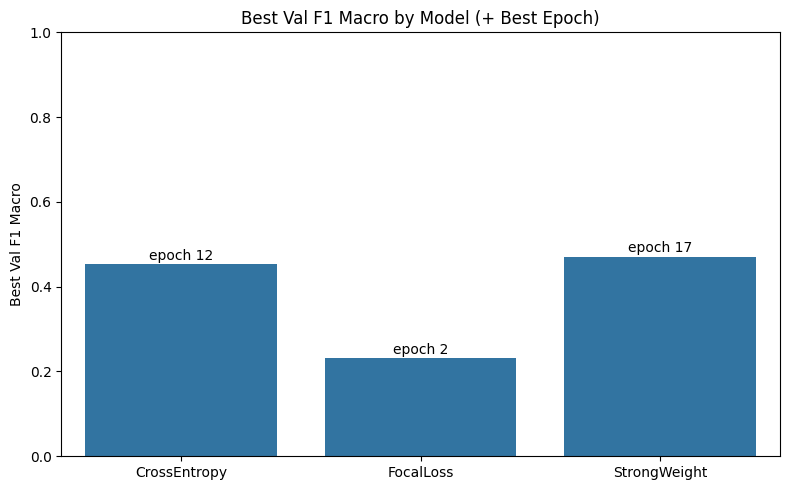


=== 문제 해결 전략 ===
✅ 다중 모델 앙상블로 안정성 확보
✅ 보수적인 Focal Loss 설정 + Label Smoothing
✅ SMOTEENN으로 데이터 균형/노이즈 정제
✅ 클래스 가중치 보수 조정
✅ F1 Score 기반 모델/앙상블 선택 및 상세 시각화


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# F1 Macro 콜백 (에폭마다 기록)
# ----------------------------
class F1MacroCallback(Callback):
    def __init__(self, x_val, y_val, name=""):
        super().__init__()
        self.x_val = x_val
        self.y_val = y_val
        self.val_f1_macro_hist = []
        self.name = name

    def on_epoch_end(self, epoch, logs=None):
        probs = self.model.predict(self.x_val, verbose=0)
        preds = np.argmax(probs, axis=1)
        f1m = f1_score(self.y_val, preds, average='macro')
        self.val_f1_macro_hist.append(f1m)
        if logs is not None:
            logs['val_f1_macro'] = f1m
        print(f" — [{self.name}] val_f1_macro: {f1m:.4f}")

# ----------------------------
# 개선된 Focal Loss
# ----------------------------
class ImprovedFocalLoss(tf.keras.losses.Loss):
    def __init__(self, alpha=None, gamma=1.5, label_smoothing=0.1, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.gamma = gamma
        self.label_smoothing = label_smoothing

    def call(self, y_true, y_pred):
        num_classes = tf.shape(y_pred)[-1]
        y_true = tf.cast(y_true, tf.int32)
        y_true_smooth = tf.one_hot(y_true, depth=num_classes)

        if self.label_smoothing > 0:
            y_true_smooth = y_true_smooth * (1.0 - self.label_smoothing) + \
                           self.label_smoothing / tf.cast(num_classes, tf.float32)

        epsilon = 1e-8
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)

        ce = -tf.reduce_sum(y_true_smooth * tf.math.log(y_pred), axis=-1)
        p_t = tf.reduce_sum(y_true_smooth * y_pred, axis=-1)
        focal_weight = tf.pow(1.0 - p_t, self.gamma)

        if self.alpha is not None:
            alpha_t = tf.reduce_sum(y_true_smooth * self.alpha, axis=-1)
            focal_loss = alpha_t * focal_weight * ce
        else:
            focal_loss = focal_weight * ce

        return tf.reduce_mean(focal_loss)

# 1. 데이터 로딩
print("데이터 로딩 중...")
train_df = pd.read_csv('df.csv')
test_df = pd.read_csv('test_prep.csv')
print(f"훈련 데이터 형태: {train_df.shape}")
print(f"테스트 데이터 형태: {test_df.shape}")

# 2. 타겟 변수 분포
print("\n=== 타겟 변수 분포 (원본) ===")
target_counts = train_df['support_needs'].value_counts().sort_index()
print(target_counts)
target_ratios = train_df['support_needs'].value_counts(normalize=True).sort_index()
print(f"비율:\n{target_ratios}")
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 전처리
def preprocess_data(df, is_train=True, scaler=None, encoders=None):
    df_processed = df.copy()

    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
    if is_train and 'support_needs' in numeric_columns:
        numeric_columns.remove('support_needs')

    print(f"수치형 컬럼: {len(numeric_columns)}개")
    print(f"범주형 컬럼: {len(categorical_columns)}개")

    if encoders is None:
        encoders = {}

    for col in categorical_columns:
        if col not in encoders:
            encoders[col] = LabelEncoder()
            df_processed[col] = encoders[col].fit_transform(df_processed[col].astype(str))
        else:
            unique_values = set(df_processed[col].astype(str).unique())
            known_values = set(encoders[col].classes_)
            if unique_values - known_values:
                mode_value = encoders[col].transform([encoders[col].classes_[0]])[0]
                df_processed[col] = df_processed[col].astype(str).map(
                    dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_)))
                ).fillna(mode_value)
            else:
                df_processed[col] = encoders[col].transform(df_processed[col].astype(str))

    if len(numeric_columns) > 0:
        df_processed[numeric_columns] = df_processed[numeric_columns].fillna(df_processed[numeric_columns].median())
    df_processed = df_processed.fillna(0)

    feature_columns = [c for c in df_processed.columns if c != 'support_needs']
    if scaler is None:
        scaler = StandardScaler()
        df_processed[feature_columns] = scaler.fit_transform(df_processed[feature_columns])
    else:
        df_processed[feature_columns] = scaler.transform(df_processed[feature_columns])

    return df_processed, scaler, encoders

print("\n=== 데이터 전처리 ===")
train_processed, scaler, encoders = preprocess_data(train_df, is_train=True)
test_processed, _, _ = preprocess_data(test_df, is_train=False, scaler=scaler, encoders=encoders)

# 4. 분할
X = train_processed.drop('support_needs', axis=1)
y = train_processed['support_needs']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n=== 분할 후 데이터 크기 ===")
print(f"훈련 세트: {X_train.shape}")
print(f"검증 세트: {X_val.shape}")

# 5. 샘플링: SMOTEENN
print("\n=== 샘플링 기법 적용: SMOTEENN ===")
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train, y_train)
print("샘플링 후 분포:")
balanced_counts = pd.Series(y_train_balanced).value_counts().sort_index()
print(balanced_counts)
print(f"균형 조정 후 크기: {X_train_balanced.shape}")

# 6. 모델 아키텍처
def build_improved_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.1),

        Dense(num_classes, activation='softmax')
    ])
    return model

# 7. 클래스 가중치(보수적)
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_balanced),
    y=y_train_balanced
)
max_weight = max(class_weights)
adjusted_weights = [min(w, max_weight * 0.6) for w in class_weights]
class_weight_dict = dict(zip(np.unique(y_train_balanced), adjusted_weights))
print(f"조정된 클래스 가중치: {class_weight_dict}")

# Focal alpha (보수적)
alpha_values = np.array([1.0, 2.0, 2.0])
if len(np.unique(y)) != len(alpha_values):
    alpha_values = np.ones(len(np.unique(y)))
print(f"Focal Loss Alpha 값: {alpha_values}")

# 8. 다중 설정 학습
def train_model_with_different_configs():
    models = []
    histories = []
    f1_histories = []
    names = []

    # 공통 콜백 팩토리
    def make_callbacks(name):
        f1cb = F1MacroCallback(X_val, y_val, name=name)
        cbs = [
            EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0),
            ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=8, verbose=0),
            f1cb
        ]
        return cbs, f1cb

    # 설정 1: Cross-Entropy + Class Weight
    name1 = "CrossEntropy"
    print(f"\n=== 모델 1: {name1} ===")
    model1 = build_improved_model(X_train_balanced.shape[1], len(np.unique(y)))
    model1.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    cbs1, f1cb1 = make_callbacks(name1)
    hist1 = model1.fit(
        X_train_balanced, y_train_balanced,
        validation_data=(X_val, y_val),
        epochs=100, batch_size=64,
        class_weight=class_weight_dict,
        callbacks=cbs1, verbose=0
    )
    models.append(model1); histories.append(hist1); f1_histories.append(f1cb1.val_f1_macro_hist); names.append(name1)

    # 설정 2: Improved Focal Loss
    name2 = "FocalLoss"
    print(f"\n=== 모델 2: {name2} ===")
    model2 = build_improved_model(X_train_balanced.shape[1], len(np.unique(y)))
    focal_loss = ImprovedFocalLoss(alpha=alpha_values, gamma=1.5, label_smoothing=0.05)
    model2.compile(optimizer=Adam(learning_rate=0.0008),
                   loss=focal_loss,
                   metrics=['accuracy'])
    cbs2, f1cb2 = make_callbacks(name2)
    hist2 = model2.fit(
        X_train_balanced, y_train_balanced,
        validation_data=(X_val, y_val),
        epochs=100, batch_size=64,
        callbacks=cbs2, verbose=0
    )
    models.append(model2); histories.append(hist2); f1_histories.append(f1cb2.val_f1_macro_hist); names.append(name2)

    # 설정 3: 원본 데이터 + 강한 클래스 가중치
    name3 = "StrongWeight"
    print(f"\n=== 모델 3: {name3} ===")
    model3 = build_improved_model(X_train.shape[1], len(np.unique(y)))
    strong_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    strong_weight_dict = dict(zip(np.unique(y_train), strong_weights))
    model3.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    cbs3, f1cb3 = make_callbacks(name3)
    hist3 = model3.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100, batch_size=32,
        class_weight=strong_weight_dict,
        callbacks=cbs3, verbose=0
    )
    models.append(model3); histories.append(hist3); f1_histories.append(f1cb3.val_f1_macro_hist); names.append(name3)

    return models, histories, f1_histories, names

models, histories, f1_histories, model_names = train_model_with_different_configs()

# 9. 모델별 성능 평가 + 시각화 준비
print("\n=== 모델별 성능 평가 ===")
best_model = None
best_f1 = -1.0
best_name = ""
per_model_f1 = {}

for name, model in zip(model_names, models):
    val_pred = model.predict(X_val, verbose=0)
    val_pred_classes = np.argmax(val_pred, axis=1)
    f1 = f1_score(y_val, val_pred_classes, average='macro')
    per_model_f1[name] = f1
    print(f"\n--- {name} ---")
    print("예측 분포:", pd.Series(val_pred_classes).value_counts().sort_index().to_dict())
    print(f"Macro F1 Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_name = name

print(f"\n최고 성능 모델: {best_name} (F1: {best_f1:.4f})")

# 10. 최고 성능 모델 상세 평가
print(f"\n=== {best_name} 모델 상세 평가 ===")
val_predictions = best_model.predict(X_val, verbose=0)
val_pred_classes = np.argmax(val_predictions, axis=1)

print("Classification Report:")
print(classification_report(y_val, val_pred_classes, digits=4))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_name} Model')
plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()

# 클래스별 F1 (best model)
prec, rec, f1_per_class, _ = precision_recall_fscore_support(y_val, val_pred_classes, average=None, labels=np.sort(y.unique()))
plt.figure(figsize=(6,4))
plt.bar(np.arange(len(f1_per_class)), f1_per_class)
plt.xticks(np.arange(len(f1_per_class)), [f"Class {i}" for i in np.sort(y.unique())])
plt.ylim(0,1)
plt.title(f'Per-class F1 - {best_name}')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 11. 앙상블 예측 (소프트 보팅)
print("\n=== 앙상블 예측 ===")
ensemble_predictions = np.zeros((len(X_val), len(np.unique(y))))
for name, model in zip(model_names, models):
    pred = model.predict(X_val, verbose=0)
    ensemble_predictions += pred
ensemble_predictions /= len(models)
ensemble_pred_classes = np.argmax(ensemble_predictions, axis=1)
ensemble_f1 = f1_score(y_val, ensemble_pred_classes, average='macro')
per_model_f1["Ensemble"] = ensemble_f1
print("앙상블 예측 분포:", pd.Series(ensemble_pred_classes).value_counts().sort_index().to_dict())
print(f"앙상블 Macro F1 Score: {ensemble_f1:.4f}")

# 12. 최종 테스트 예측 (앙상블 vs 최고 모델)
if ensemble_f1 > best_f1:
    print("앙상블 모델이 더 좋은 성능을 보임")
    final_model = "Ensemble"
    test_predictions = np.zeros((len(test_processed), len(np.unique(y))))
    for name, model in zip(model_names, models):
        pred = model.predict(test_processed, verbose=0)
        test_predictions += pred
    test_predictions /= len(models)
else:
    print(f"{best_name} 단일 모델이 더 좋은 성능을 보임")
    final_model = best_name
    test_predictions = best_model.predict(test_processed, verbose=0)

test_pred_classes = np.argmax(test_predictions, axis=1)
print("\n=== 최종 테스트 예측 결과 ===")
print("예측 분포:", pd.Series(test_pred_classes).value_counts().sort_index().to_dict())
print("예측 비율:", pd.Series(test_pred_classes).value_counts(normalize=True).sort_index().to_dict())

# 13. 결과 저장
result_df = pd.DataFrame({
    'predicted_support_needs': test_pred_classes,
    'prediction_probability_0': test_predictions[:, 0],
    'prediction_probability_1': test_predictions[:, 1],
    'prediction_probability_2': test_predictions[:, 2],
    'max_probability': np.max(test_predictions, axis=1),
    'prediction_confidence': np.max(test_predictions, axis=1) - np.sort(test_predictions, axis=1)[:, -2]
})
if 'index' in test_df.columns:
    result_df['original_index'] = test_df['index']
else:
    result_df['original_index'] = test_df.index

filename = f'support_needs_predictions_improved_{final_model.lower()}.csv'
result_df.to_csv(filename, index=False)
print(f"\n예측 결과가 '{filename}' 파일로 저장되었습니다.")

# 14. 성능 요약
print("\n=== 최종 성능 요약 ===")
print(f"사용된 최종 모델: {final_model}")
print(f"검증 데이터 F1 Score: {max(ensemble_f1, best_f1):.4f}")
print("\n각 클래스 테스트 예측 비율:")
for i in np.sort(y.unique()):
    ratio = (test_pred_classes == i).mean()
    print(f"클래스 {i}: {ratio:.3f}")

# ----------------------------
# [시각화 강화] 학습 곡선/비교 차트
# ----------------------------

# 모델별 학습 곡선 플롯 (loss / acc / f1 / lr)
def plot_training_curves(histories, f1_histories, names):
    # 길이가 다른 history를 고려해서 x축 동기화
    max_len = max(len(h.history['loss']) for h in histories)
    fig, axes = plt.subplots(4, 1, figsize=(10, 16))
    titles = ['Validation Loss', 'Validation Accuracy', 'Validation F1 Macro', 'Learning Rate']
    for idx, (hist, f1_hist, name) in enumerate(zip(histories, f1_histories, names)):
        epochs = np.arange(1, len(hist.history['loss'])+1)
        # Val Loss
        axes[0].plot(epochs, hist.history['val_loss'], label=name)
        # Val Acc
        axes[1].plot(epochs, hist.history['val_accuracy'], label=name)
        # Val F1
        val_f1_list = hist.history.get('val_f1_macro', f1_hist)
        axes[2].plot(epochs[:len(val_f1_list)], val_f1_list, label=name)
        # LR
        lr_hist = hist.history.get('lr', [hist.history.get('learning_rate', [0.001]*len(epochs))][0])
        axes[3].plot(epochs[:len(lr_hist)], lr_hist[:len(epochs)], label=name)

    for ax, t in zip(axes, titles):
        ax.set_title(t); ax.set_xlabel('Epoch'); ax.legend()
        if t == 'Learning Rate':
            ax.set_yscale('log')
    plt.tight_layout(); plt.show()

plot_training_curves(histories, f1_histories, model_names)

# 모델/앙상블 F1 비교 막대
plt.figure(figsize=(8,5))
labels = list(per_model_f1.keys())
values = [per_model_f1[k] for k in labels]
sns.barplot(x=labels, y=values)
plt.ylim(0,1)
plt.title('Macro F1 by Model (Validation)')
plt.ylabel('Macro F1'); plt.xlabel('Model')
plt.tight_layout(); plt.show()

# 베스트 에폭 표시 (각 모델의 최고 val_f1_macro)
best_epochs = []
best_vals = []
for hist, f1_hist in zip(histories, f1_histories):
    vals = hist.history.get('val_f1_macro', f1_hist)
    best_vals.append(np.max(vals))
    best_epochs.append(np.argmax(vals)+1)
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=best_vals)
for i, (v,e) in enumerate(zip(best_vals, best_epochs)):
    plt.text(i, v+0.01, f"epoch {e}", ha='center')
plt.ylim(0,1)
plt.title('Best Val F1 Macro by Model (+ Best Epoch)')
plt.ylabel('Best Val F1 Macro')
plt.tight_layout(); plt.show()

print("\n=== 문제 해결 전략 ===")
print("✅ 다중 모델 앙상블로 안정성 확보")
print("✅ 보수적인 Focal Loss 설정 + Label Smoothing")
print("✅ SMOTEENN으로 데이터 균형/노이즈 정제")
print("✅ 클래스 가중치 보수 조정")
print("✅ F1 Score 기반 모델/앙상블 선택 및 상세 시각화")

# 가장 성능이 좋았던 모델 3 구체적으로 설명!
class_weight = compute_class_weight(class_weight='balanced', classes=classes, y=y)

여기서 계산되는 클래스별 가중치는 다음 공식:

w_j = n_samples/{n_classes * n_j}

	•	w_j: 클래스 j의 가중치

	•	n_samples: 전체 샘플 수

	•	n_classes: 전체 클래스 개수

	•	n_j: 클래스 j에 속하는 샘플 수

즉, 클래스 데이터가 적을수록 가중치가 커지고, 데이터가 많은 클래스는 가중치가 작아져서 손실 계산 시 균형을 맞춰줌

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1) 데이터 로딩
train_df = pd.read_csv('df.csv')

# 2) 전처리 (사용자 코드와 호환)
def preprocess_data(df, is_train=True, scaler=None, encoders=None):
    df_processed = df.copy()
    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
    if is_train and 'support_needs' in numeric_columns:
        numeric_columns.remove('support_needs')

    if encoders is None:
        encoders = {}
    for col in categorical_columns:
        if col not in encoders:
            encoders[col] = LabelEncoder()
            df_processed[col] = encoders[col].fit_transform(df_processed[col].astype(str))
        else:
            unique_values = set(df_processed[col].astype(str).unique())
            known_values = set(encoders[col].classes_)
            if unique_values - known_values:
                mode_value = encoders[col].transform([encoders[col].classes_[0]])[0]
                df_processed[col] = df_processed[col].astype(str).map(
                    dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_)))
                ).fillna(mode_value)
            else:
                df_processed[col] = encoders[col].transform(df_processed[col].astype(str))

    if len(numeric_columns) > 0:
        df_processed[numeric_columns] = df_processed[numeric_columns].fillna(df_processed[numeric_columns].median())
    df_processed = df_processed.fillna(0)

    feature_columns = [c for c in df_processed.columns if c != 'support_needs']
    if scaler is None:
        scaler = StandardScaler()
        df_processed[feature_columns] = scaler.fit_transform(df_processed[feature_columns])
    else:
        df_processed[feature_columns] = scaler.transform(df_processed[feature_columns])
    return df_processed, scaler, encoders

train_processed, scaler, encoders = preprocess_data(train_df, is_train=True)

# 3) 분할(동일 조건)
X = train_processed.drop('support_needs', axis=1).values
y = train_processed['support_needs'].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
n_classes = len(np.unique(y))

# 4) 평가 헬퍼 (F1-macro만)
def eval_f1_macro(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred, average='macro')

results = []

# (A) 전부 0 예측
results.append(("Dummy (all-zero)", eval_f1_macro(DummyClassifier(strategy='constant', constant=0))))

# (B) Most frequent (참고 베이스라인)
results.append(("Dummy (most_frequent)", eval_f1_macro(DummyClassifier(strategy='most_frequent'))))

# (C) Logistic Regression
results.append(("LogisticRegression", eval_f1_macro(LogisticRegression(max_iter=1000))))

# (D) Linear SVC
results.append(("LinearSVC", eval_f1_macro(LinearSVC(dual="auto"))))

# (E) SVC (RBF)  — 느리면 주석 처리해도 OK
results.append(("SVC (RBF)", eval_f1_macro(SVC(kernel='rbf'))))

# (F) KNN
results.append(("KNN (k=7)", eval_f1_macro(KNeighborsClassifier(n_neighbors=7))))

# (G) Decision Tree
results.append(("DecisionTree", eval_f1_macro(DecisionTreeClassifier(random_state=42))))

# (H) Random Forest
results.append(("RandomForest", eval_f1_macro(RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))))

# (I) ExtraTrees
results.append(("ExtraTrees", eval_f1_macro(ExtraTreesClassifier(n_estimators=300, random_state=42, n_jobs=-1))))

# (J) Gradient Boosting
results.append(("GradientBoosting", eval_f1_macro(GradientBoostingClassifier(random_state=42))))

# (K) HistGradientBoosting
results.append(("HistGradientBoosting", eval_f1_macro(HistGradientBoostingClassifier(random_state=42))))

# (L) GaussianNB
results.append(("GaussianNB", eval_f1_macro(GaussianNB())))

# 5) 깡통 MLP (ReLU/Softmax/CE만; 정규화/가중치/콜백 없음)
def build_plain_mlp(input_dim, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=[])  # accuracy도 계산 안 함
    return model

def eval_plain_mlp_f1():
    tf.keras.utils.set_random_seed(42)
    mlp = build_plain_mlp(X_train.shape[1], n_classes)
    mlp.fit(X_train, y_train, epochs=40, batch_size=64, verbose=0)  # 고정 세팅
    y_pred = np.argmax(mlp.predict(X_val, verbose=0), axis=1)
    return f1_score(y_val, y_pred, average='macro')

results.append(("Plain MLP (no tricks)", eval_plain_mlp_f1()))

# 6) 표로 정리 + 저장
df_results = pd.DataFrame(results, columns=["model", "val_f1_macro"]).sort_values("val_f1_macro", ascending=False)
print("\n=== Validation F1-macro Comparison ===")
print(df_results.to_string(index=False))

df_results.to_csv("baseline_val_f1_macro_comparison.csv", index=False)
print("\nSaved: baseline_val_f1_macro_comparison.csv")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Validation F1-macro Comparison ===
                model  val_f1_macro
         RandomForest      0.445469
           ExtraTrees      0.436380
Plain MLP (no tricks)      0.434156
 HistGradientBoosting      0.411768
     GradientBoosting      0.399707
         DecisionTree      0.390020
            KNN (k=7)      0.384586
            SVC (RBF)      0.380221
           GaussianNB      0.352655
   LogisticRegression      0.348038
            LinearSVC      0.340920
Dummy (most_frequent)      0.211101
     Dummy (all-zero)      0.211101

Saved: baseline_val_f1_macro_comparison.csv


최적화 기법 + 클래스별 가중치 적용한 MLP의

 검증 데이터 F1 Score: 0.4651

 과 비교하면 , 다른 baseline보다 소폭 성능이 좋음을 알 수 있다.

 단, 데이터 imbalance가 나타난다고 무조건 '완화한다'고 알려진 방법들을 적용하는 것이 실제로도 좋은 것은 아니라는 것을 느낄 수 있다 !
